In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [4]:
df = pd.read_csv('DA_job_dataset_cleaned.csv', index_col = 0)
df.head(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,min_salary,max_salary,avg_salary,Company_name_text,State,Age of company,python_y,sql_y,aws_y,spark_y,tableau_y,excel_y,r_studio_y,power_bi_y,desc_len,seniority
0,Data Analyst,$42K-$75K (Glassdoor est.),DEPARTMENT: Analytics\nPOSITION SUMMARY\nNewDa...,3.9,NewDay USA\n3.9,"Fulton, MD",-1,501 to 1000 Employees,1999,Company - Private,Lending,Finance,Unknown / Non-Applicable,-1,0,42000,75000,58500.0,NewDay USA,MD,21,0,1,0,0,0,1,0,0,2032,na
1,Market Data Analyst,$59K-$104K (Glassdoor est.),"Thursday, October 22, 2020\n\nMarket Support S...",3.8,ISO New England\n3.8,"Holyoke, MA",-1,501 to 1000 Employees,1997,Nonprofit Organization,Utilities,"Oil, Gas, Energy & Utilities",Unknown / Non-Applicable,-1,0,59000,104000,81500.0,ISO New England,MA,23,0,1,0,0,0,1,0,0,3183,na


In [5]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'min_salary', 'max_salary', 'avg_salary', 'Company_name_text',
       'State', 'Age of company', 'python_y', 'sql_y', 'aws_y', 'spark_y',
       'tableau_y', 'excel_y', 'r_studio_y', 'power_bi_y', 'desc_len',
       'seniority'],
      dtype='object')

# Choose relavent columns

In [6]:


# lasso regression
# random forest
# tune models GridsearchCV
#test ensembles

In [7]:
df_model = df[['avg_salary', 'Rating','Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'State', 'Age of company', 'python_y', 'sql_y', 'aws_y', 'spark_y',
       'tableau_y', 'excel_y', 'r_studio_y', 'power_bi_y', 'desc_len',
       'seniority']]

In [8]:
df_model.head(2)

,avg_salary,Rating,Size,Type of ownership,Industry,Sector,Revenue,State,Age of company,python_y,sql_y,aws_y,spark_y,tableau_y,excel_y,r_studio_y,power_bi_y,desc_len,seniority
0,58500.0,3.9,501 to 1000 Employees,Company - Private,Lending,Finance,Unknown / Non-Applicable,MD,21,0,1,0,0,0,1,0,0,2032,na
1,81500.0,3.8,501 to 1000 Employees,Nonprofit Organization,Utilities,"Oil, Gas, Energy & Utilities",Unknown / Non-Applicable,MA,23,0,1,0,0,0,1,0,0,3183,na


# Get dummy data

In [9]:
df_dum = pd.get_dummies(df_model)
df_dum.head(1)

,avg_salary,Rating,Age of company,python_y,sql_y,aws_y,spark_y,tableau_y,excel_y,r_studio_y,power_bi_y,desc_len,Size_1 to 50 Employees,Size_10000+ Employees,Size_1001 to 5000 Employees,Size_201 to 500 Employees,Size_5001 to 10000 Employees,Size_501 to 1000 Employees,Size_51 to 200 Employees,Size_Unknown,Type of ownership_College / University,Type of ownership_Company - Private,Type of ownership_Company - Public,Type of ownership_Contract,Type of ownership_Government,Type of ownership_Hospital,Type of ownership_Nonprofit Organization,Type of ownership_Other Organization,Type of ownership_Private Practice / Firm,Type of ownership_School / School District,Type of ownership_Subsidiary or Business Segment,Industry_-1,Industry_Accounting,Industry_Advertising & Marketing,Industry_Aerospace & Defense,Industry_Architectural & Engineering Services,Industry_Automotive Parts & Accessories Stores,Industry_Banks & Credit Unions,Industry_Biotech & Pharmaceuticals,Industry_Bus Transportation Services,"Industry_Cable, Internet & Telephone Providers",Industry_Charter Air Travel,Industry_Chemical Manufacturing,Industry_Colleges & Universities,Industry_Commercial Equipment Repair & Maintenance,Industry_Computer Hardware & Software,Industry_Construction,Industry_Consulting,Industry_Consumer Products Manufacturing,Industry_Convenience Stores & Truck Stops,"Industry_Department, Clothing, & Shoe Stores",Industry_Education Training Services,Industry_Electrical & Electronic Manufacturing,Industry_Energy,Industry_Enterprise Software & Network Solutions,Industry_Express Delivery Services,Industry_Federal Agencies,Industry_Financial Transaction Processing,Industry_Food & Beverage Manufacturing,Industry_Food Production,Industry_Health Care Products Manufacturing,Industry_Health Care Services & Hospitals,Industry_Health Fundraising Organizations,"Industry_Health, Beauty, & Fitness",Industry_Home Furniture & Housewares Stores,"Industry_Hotels, Motels, & Resorts",Industry_IT Services,Industry_Industrial Manufacturing,Industry_Insurance Agencies & Brokerages,Industry_Insurance Carriers,Industry_Internet,Industry_Investment Banking & Asset Management,Industry_K-12 Education,Industry_Lending,Industry_Logistics & Supply Chain,Industry_Membership Organizations,Industry_Metal & Mineral Manufacturing,Industry_Miscellaneous Manufacturing,Industry_Municipal Governments,Industry_News Outlet,Industry_Oil & Gas Services,Industry_Other Retail Stores,Industry_Passenger Rail,Industry_Photography,Industry_Publishing,Industry_Real Estate,Industry_Religious Organizations,Industry_Research & Development,Industry_Security Services,Industry_Social Assistance,Industry_Sporting Goods Stores,Industry_Sports & Recreation,Industry_Staffing & Outsourcing,Industry_State & Regional Agencies,Industry_TV Broadcast & Cable Networks,Industry_Telecommunications Manufacturing,Industry_Telecommunications Services,Industry_Transportation Equipment Manufacturing,Industry_Transportation Management,Industry_Travel Agencies,Industry_Utilities,Industry_Vehicle Dealers,Industry_Video Games,Industry_Wholesale,Sector_-1,Sector_Accounting & Legal,Sector_Aerospace & Defense,Sector_Agriculture & Forestry,"Sector_Arts, Entertainment & Recreation",Sector_Biotech & Pharmaceuticals,Sector_Business Services,"Sector_Construction, Repair & Maintenance",Sector_Consumer Services,Sector_Education,Sector_Finance,Sector_Government,Sector_Health Care,Sector_Information Technology,Sector_Insurance,Sector_Manufacturing,Sector_Media,Sector_Non-Profit,"Sector_Oil, Gas, Energy & Utilities",Sector_Real Estate,"Sector_Restaurants, Bars & Food Services",Sector_Retail,Sector_Telecommunications,Sector_Transportation & Logistics,Sector_Travel & Tourism,Revenue_$1 to $2 billion (USD),Revenue_$1 to $5 million (USD),Revenue_$10 to $25 million (USD),Revenue_$10+ billion (USD),Revenue_$100 to $500 million (USD),Revenue_$2 to $5 billion (USD),Revenue_$25 to $50 million (USD),Revenue_$5 to $10 billion (USD),Revenue_$5 to $10 million (US

# Train test split data

In [39]:
X  = df_dum.drop('avg_salary',axis=1)
y  = df.avg_salary

X_train, X_test, y_train, y_tes = train_test_split(X, y, test_size = 0.3 , random_state = 42)

# Mutilple linear regression

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm

In [41]:
X_sm = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             avg_salary   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     10.55
Date:                Fri, 13 Nov 2020   Prob (F-statistic):          1.48e-115
Time:                        14:27:38   Log-Likelihood:                -9770.6
No. Observations:                 930   AIC:                         1.985e+04
Df Residuals:                     774   BIC:                         2.061e+04
Df Model:                         155                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                               3.047e+04   3172.524      9.606      0.000    2.42e+04    3.67e+04
Rating                                              1699.4763    894.461      1.900      0.058     -56.381    3455.334
Age of company                                        -3.4462     13.114     -0.263      0.793     -29.190      22.298
python_y                                            4030.0189   1240.502      3.249      0.001    1594.871    6465.167
sql_y                                              -1326.8230   1170.572     -1.133      0.257   -3624.694     971.048
aws_y                                               -250.3256   1521.531     -0.165      0.869   -3237.143    2736.492
spark_y                                            -4099.1496   2451.127     -1.672      0.095   -8910.794     712.495
tableau_y                                           1143.3491   1125.012      1.016      0.310   -1065.088    3351.786
excel_y                                             -552.2023   1070.648     -0.516      0.606   -2653.920    1549.515
r_studio_y                                         -7538.4991   1771.376     -4.256      0.000    -1.1e+04   -4061.229
power_bi_y                                         -2697.3039   1562.588     -1.726      0.085   -5764.717     370.109
desc_len                                               2.0246      0.299      6.772      0.000       1.438       2.612
Size_1 to 50 Employees                              5902.4436   2455.940      2.403      0.016    1081.350    1.07e+04
Size_10000+ Employees                               1971.9830   2182.959      0.903      0.367   -2313.239    6257.204
Size_1001 to 5000 Employees                         3689.6477   1351.139      2.731      0.006    1037.317    6341.978
Size_201 to 500 Employees                           2319.5036   1495.417      1.551      0.121    -616.050    5255.057
Size_5001 to 10000 Employees                        2649.3906   2112.273      1.254      0.210   -1497.071    6795.853
Size_501 to 1000 Employees                          7484.2978   1698.157      4.407      0.000    4150.759    1.08e+04
Size_51 to 200 Employees                            -403.8207   1645.189     -0.245      0.806   -3633.383    2825.741
Size_Unknown                                        6860.5240   4848.492      1.415      0.157   -2657.229    1.64e+04
Type of ownership_College / University              1.458e+04   9902.166      1.472      0.141   -4859.895     3.4e+04
Type of ownership_Company - Private                 2534.3684   2157.450      1.175      0.240   -1700.778    6769.515
Type of ownership_Company - Public                  2970.4414   2379.829      1.248      0.212   -1701.244  

In [42]:
lm = LinearRegression()
lm.fit(X_train,y_train)

np.mean(cross_val_score(lm, X_train,y_train,scoring='neg_mean_absolute_error',cv=3))


-7911.774629507646

# Lasso regression

In [51]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [44]:
lm_l = Lasso()
np.mean(cross_val_score(lm_l,X_train,y_train,scoring='neg_mean_absolute_error',cv = 5))

/Users/leo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 642456176.189682, tolerance: 12713089.182692308
  positive)
/Users/leo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 671557445.5604897, tolerance: 12873576.007677544
  positive)
/Users/leo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1426775863.231697, tolerance: 11702719.385796545
  positive)
/Users/leo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the numbe

-7963.69024795776

In [98]:
alpha = []
score = []

for i in range(1,1000):
    alpha.append(i/10)
    lml = Lasso(i/10)
    score.append(np.mean(cross_val_score(lml,X_train,y_train,scoring='neg_mean_absolute_error',cv=3)))

/Users/leo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9407843308.365145, tolerance: 11006274.481566822
  positive)
/Users/leo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12850904606.372545, tolerance: 10973199.078341015
  positive)
/Users/leo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9872013362.201242, tolerance: 8910289.458525347
  positive)
/Users/leo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the numb

/Users/leo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8930503450.743073, tolerance: 8910289.458525347
  positive)
/Users/leo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3398354557.4744053, tolerance: 11006274.481566822
  positive)
/Users/leo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8908733202.648598, tolerance: 8910289.458525347
  positive)
/Users/leo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the numbe

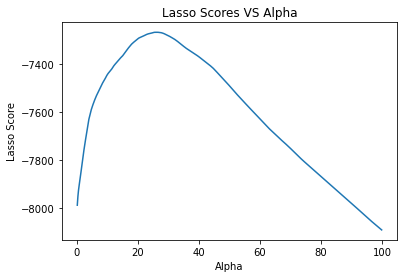

In [99]:
plt.xlabel('Alpha')
plt.ylabel('Lasso Score')
plt.title('Lasso Scores VS Alpha')
plt.plot(alpha,score)

In [100]:
result = list(zip(alpha,score))
df = pd.DataFrame(result,columns=('Alpha','Scores'))
alpha_s = df[df['Scores'] == df['Scores'].max()]['Alpha'].values[0]
alpha_s

26.4

# Random Forest Regression

In [101]:
from sklearn.ensemble import RandomForestRegressor

In [102]:
rf = RandomForestRegressor()
np.mean(cross_val_score(rf, X_train, y_train, scoring= 'neg_mean_absolute_error', cv = 3))

-5976.651305683564

In [ ]:
import pandas as pd
plt.show() 